# [2020 신입 데이터 분석가 채용 : basic analytics test]

이 데이터는 한 가상의 온라인 쇼핑몰의 뷰티 카테고리의 1주일치 판매량 데이터입니다. 

In [137]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [139]:
import seaborn as sns
sns.set()
import matplotlib
from IPython.display import set_matplotlib_formats

matplotlib.rc('font', family='NanumGothic')

matplotlib.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')
%matplotlib inline

In [149]:
df = pd.read_pickle('siteA_weekly_data_20191118_20191124.pickle')

## 데이터 설명서
- doc_id : id 
- category : 상품의 카테고리
- goods_name : 상품명
- sold_day : 판매일자
- sell_amount: 판매량
- site price : 판매 가격
- brand_name : 브랜드명
- tag : 태그 키워드
- 이하 칼럼 : 상품 상세설명에 기록된 상세 정보

In [150]:
df.iloc[0]

doc_id                          T_siteA_3542_9327326038_20191118
category                             siteA > 뷰티 > 남성화장품 > 남성BB크림
goods_name                          1+1 무칸 내츄럴 남자비비크림 외 남자화장품 모음
sold_day                                                20191118
sell_amount                                                    1
site_price                                                 23900
brand_name                                                    무칸
seller_name                                                   무칸
e-mail                                         jcc6960@gmail.com
tag                                                         번들상품
제조자/수입자        제조자/수입품의 경우 수입자를 함께 표기=상품상세설명 참조/제조업자 및 책임판매업자=무칸
제조국(원산지)                                           제조국=한국/원산지=국내
AS정보           고객문의 대표번호=070-4259-6960/A/S안내=JCC SHOP 담당자 070...
용량(중량)                                                 상품상세설명 참조
크기(무게)         1,200g(예상 기본무게) * 옵션 및 추가 구성상품은 제외된 무게이며, 실제 측...
대표자명                     

# 1. 가격과 판매량 비교하기
1) 가격(site_price)과 판매량(sell_amount) 사이의 관계를 표현할 수 있는 visualization을 해보세요.

2) 위 결과에서 이례적인 부분은 어떤 부분들이며 실제로 어떤 경우에 그런 상황이 발생할 수 있을지를 설명해 주세요.

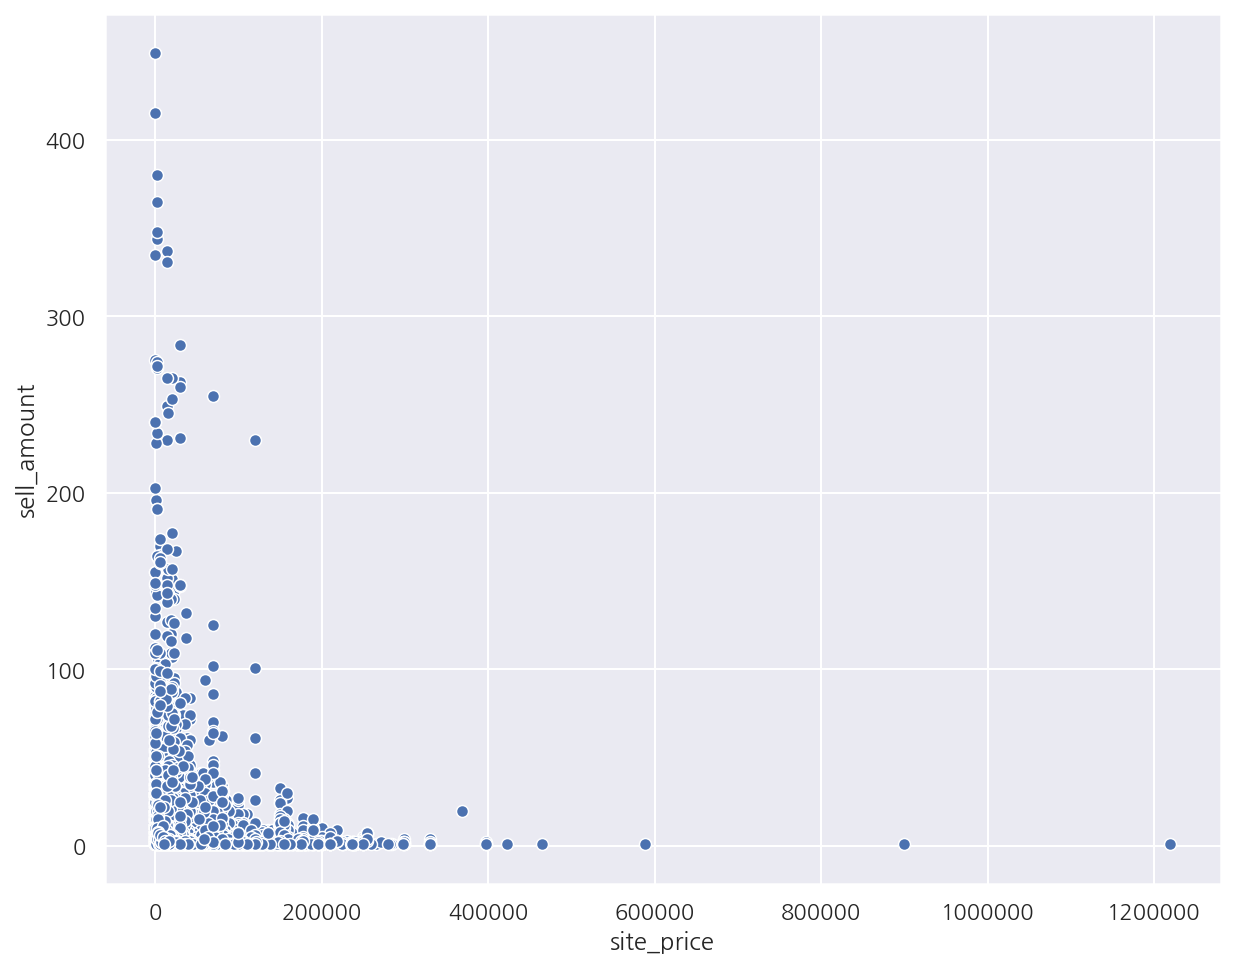

In [148]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='site_price',y='sell_amount',data=df)

# 2. 브랜드별 상품 분석하기
주어진 데이터 안에서 가장 판매상품(goods_name)이 많은 브랜드 상위 5개를 나열해주세요. (브랜드명이 비어있거나, 상품상세설명 참조 등의 알 수 없는 브랜드는 제외)


In [143]:
##[답안 코드 입력]

## 전체 브랜드 개수(null값, 상품상세설명참조 제거)
print("brand name 제거 후 unique : ",df['brand_name'].nunique())

drop_brand = ['상품상세설명 참조','']
df = df[~df['brand_name'].isin(drop_brand)]

print("brand name 제거 후 unique : ",df['brand_name'].nunique())

df.groupby('brand_name')[['goods_name']].count().sort_values(by='goods_name',ascending=False).head(5)

brand name 제거 후 unique :  1724
brand name 제거 후 unique :  1722


,goods_name
brand_name,
릴리바이레드,1949
클리오,1489
passioncat,1004
에스티로더,978
헤라,921


# 3. 셀러 분석하기
1.여러 상품을, 동일 판매자의 상품으로 추정할 수 있는 feature(column)를 리스트업해주세요. 
 
2.위 feature 중 가장 신뢰할 수 있는 feature(column)는 무엇인지, 선정 근거는 무엇인지 적어주세요.
•	특정 판매자를 사례로 들어 설명하셔도 됩니다. 

* 사업자 번호로 동일 판매자의 상품을 추적

In [162]:
## 사업자 번호
df['사업자번호'].value_counts()

8708801143    4372
1068151510    2502
2118899528    2363
5958100040    2076
1178133400    2053
              ... 
4731500430       1
2268800333       1
5010593477       1
5038604232       1
1848600073       1
Name: 사업자번호, Length: 1928, dtype: int64

In [163]:
# 신세계 사업자 번호 조회
df[df['사업자번호'] == '8708801143']['seller_name'].value_counts()

신세계백화점    2726
신세계몰      1646
Name: seller_name, dtype: int64

In [160]:
# 롯데 사업자 번호 조회
df[df['사업자번호'] == '1178133400']['seller_name'].value_counts()

롯데아이몰    1555
롯데백화점     487
롯데홈쇼핑      11
Name: seller_name, dtype: int64

# 4. 카테고리 분석하기
1. 카테고리의 3번째 뎁스*의 카테고리의 일자별 판매량(sell_amount) 등락을 확인하는 그래프를 그려보시오.
*예: ‘siteA > 뷰티 > 남성화장품 > 남성에센스’의 3번째 뎁스는 ‘남성 화장품’ 입니다.



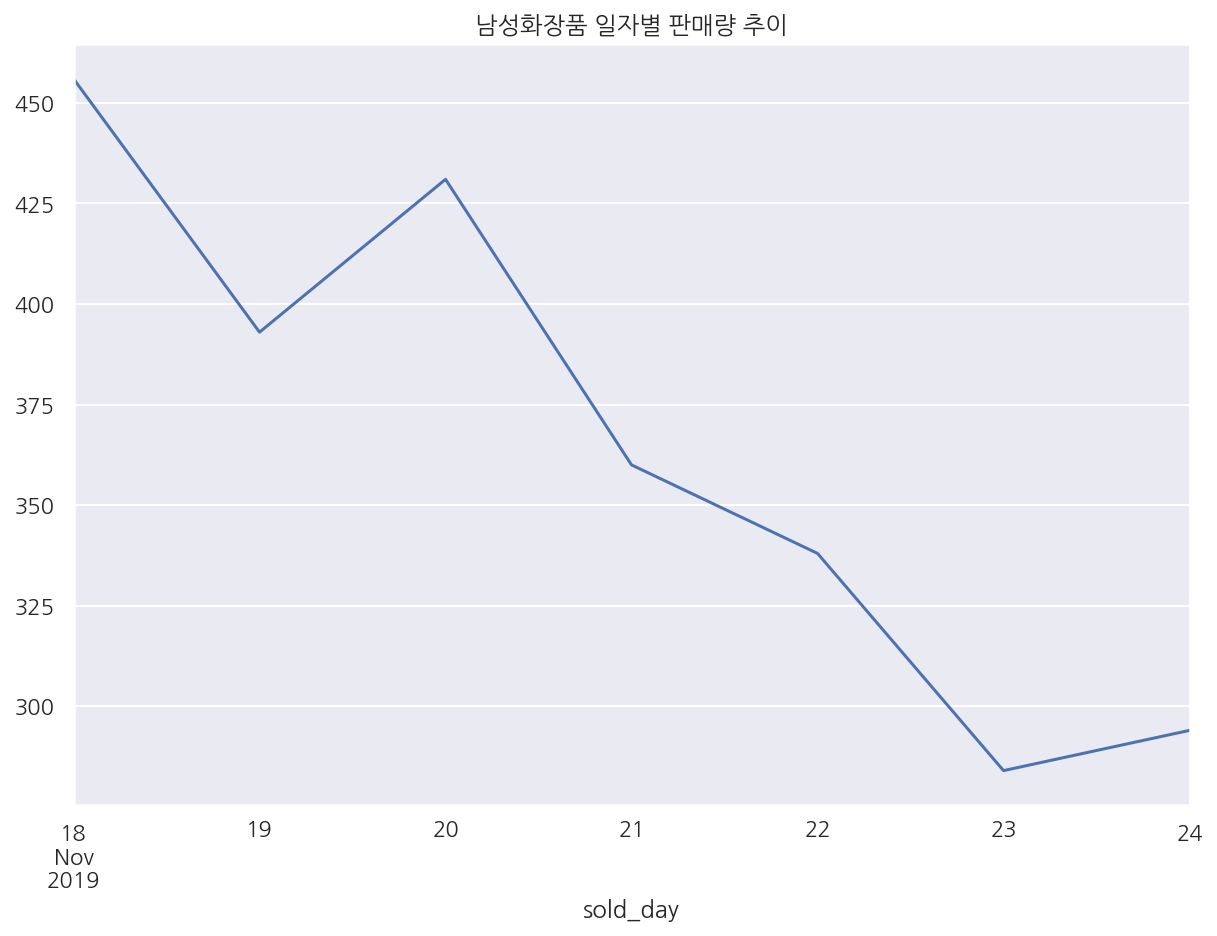

sold_day
2019-11-18    456
2019-11-19    393
2019-11-20    431
2019-11-21    360
2019-11-22    338
2019-11-23    284
2019-11-24    294
Freq: D, Name: 3rd_category, dtype: int64

In [144]:
## 3rd depth를 추출
def get_3rd_depth(x):
    return x.split('>')[2].strip()

df['3rd_category'] = df['category'].apply(get_3rd_depth)

## sold_day 를 datetime으로 변경
df['sold_day'] = pd.to_datetime(df['sold_day'])

## 일자별 판매량 등락 시각화를 위한 time index 데이터프레임 생성
tidx_df = df.set_index('sold_day')

## 시각화 함수
## time_index 데이터프레임과 시각화하고자하는 카테고리명을 입력
def viz_3rd_category(df, category_name):
    
    df = df[df['3rd_category'] == category_name]
    df = df.resample('D')['3rd_category'].count()
    
    plt.figure(figsize=(10,7))
    df.plot()
    plt.title(category_name+" 일자별 판매량 추이")
    plt.show()
    
    return df 

viz_3rd_catgeory_df = viz_3rd_category(tidx_df,"남성화장품")
viz_3rd_catgeory_df


2. 다음 데이터의 상품은 메이크업, 스킨케어, 헤어케어, 바디케어, 클렌징/필링, 네일케어, 남성화장품, 뷰티소품,선케, 향수 카테고리에 모두 속해 있습니다.

이 사실을 이용하여 아래 테이블을 작성해주세요.


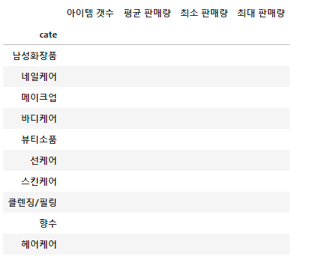

In [130]:
print("3rd 카테고리 개수 : ",df['3rd_category'].nunique())
unique_3rd_category = df['3rd_category'].unique()

## 3rd_카테고리 별 정보를 담은 DataFrame 반환
def get_3rd_category_info(df,unique_3rd_category):
    
    category_info = pd.DataFrame(columns=['아이템 갯수','평균 판매량','최소 판매량','최대 판매량'],index=unique_3rd_category)
    
    for cate in unique_3rd_category:
        info_list = []
        info_list.append(len(df[df['3rd_category'] == cate]))
        info_list.append(df[df['3rd_category'] == cate]['sell_amount'].mean())
        info_list.append(df[df['3rd_category'] == cate]['sell_amount'].min())
        info_list.append(df[df['3rd_category'] == cate]['sell_amount'].max())
        
        category_info.loc[cate] = info_list
        
    return category_info

category_info = get_3rd_category_info(df,unique_3rd_category)
category_info

3rd 카테고리 개수 :  10


,아이템 갯수,평균 판매량,최소 판매량,최대 판매량
남성화장품,2556,3.32668,1,196
네일케어,2113,2.51207,1,62
메이크업,22458,2.45681,1,337
바디케어,6606,4.35347,1,365
뷰티소품,1286,2.37558,1,83
선케어,1735,3.16023,1,84
스킨케어,14970,4.42993,1,449
클렌징/필링,4313,3.87735,1,152
향수,1060,1.73302,1,16
헤어케어,7510,3.46924,1,255
